# 4.10 Coding Etiquette & Excel Reporting
Part 2

# *Table of Contents:*

## 1. Import Libraries

## 2. Creation of visualizations to show relationships between variables

### - Family Profile Distribution

### - Family Profile Distribution by Region

### - Family Profile Distribution by Department

### - Income Group Distribution

### - Income Group Distribution by Region

### - Income Group Distribution by Department

### - Age Group Distribution

### - Age Group Distribution by Region

### - Age Group Distribution by Department

### - Department Distribution by Number of Orders

### - Department Distribution by Region

## 3. Sales Team Key Questions & Answers

### - Busiest Days of the Week

### - Busiest Hours of the Day

### - Busiest Hours of the Day by Price Range

### - Price Range Distribution

### - Income Group Distribution by Price Range

### - Price Range Distribution by Family Profile

### - Orders Distribution by Department

### - Customer Distribution by Brand Loyalty

### - Ordering Habits by Customer's Loyalty

### - Ordering Habits by Region

### - Ordering Habits Distribution by Age Group and Family Profile

### - Spending Power Distribution by Age and Income

### - Spending Power Distribution by Age and Family Profile

### - Family Status Distribution

## 1. Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import latest merged_df_final from PKL file

path = r'C:\Users\natha\OneDrive\Desktop\Data Analytics\Jupyter\09-2023 Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_df_final.pkl'))

In [3]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,number_of_dependents,family_status,income,region,activity_flag,age_group,income_group,department,dependents_group,family_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,Midwest,high activity,Elderly (65 and above),Middle Income,snacks,Has dependents,Married male with children
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,Midwest,high activity,Elderly (65 and above),Middle Income,snacks,Has dependents,Married male with children
2,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,1,married,49620,Midwest,high activity,Elderly (65 and above),Middle Income,snacks,Has dependents,Married male with children
3,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,7,0,12,...,1,married,49620,Midwest,high activity,Elderly (65 and above),Middle Income,snacks,Has dependents,Married male with children
4,13424,Almonds,45,19,4.2,3139998,138,28,6,11,...,1,married,49620,Midwest,high activity,Elderly (65 and above),Middle Income,snacks,Has dependents,Married male with children


In [4]:
df.shape

(30959687, 36)

In [5]:
# Remove limit on display columns

pd.set_option('display.max_columns', None)

In [6]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'is_first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'user_mean_price',
       'spending_flag', 'order_frequency_flag', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'family_status', 'income',
       'region', 'activity_flag', 'age_group', 'income_group', 'department',
       'dependents_group', 'family_profile'],
      dtype='object')

## 2. Creation of visualizations to show relationships between variables

### - Family Profile Distribution

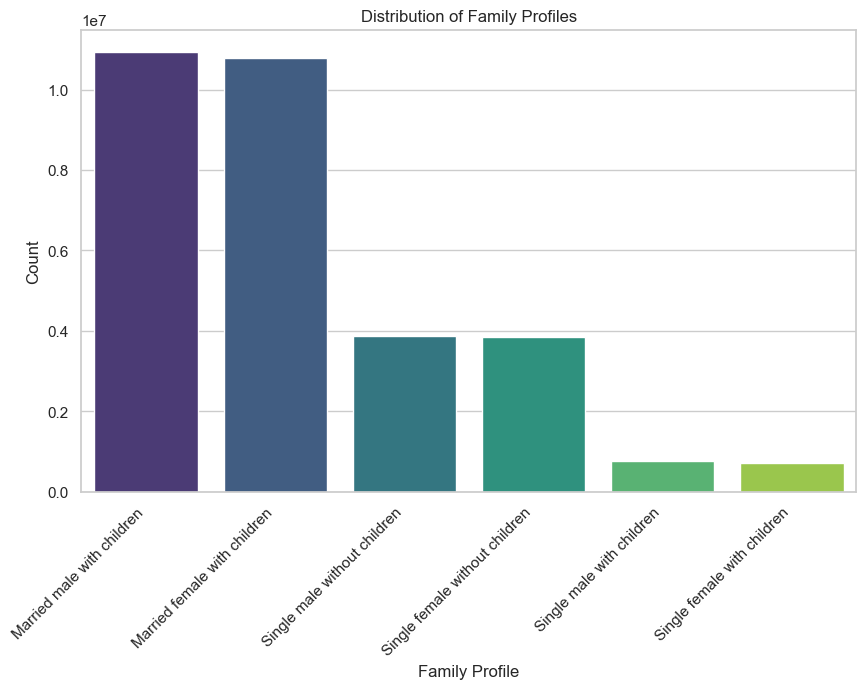

In [7]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for the distribution of family profiles
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='family_profile', order=df['family_profile'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Family Profiles')
plt.xlabel('Family Profile')
plt.ylabel('Count')

# Save figure to path
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_distribution.png'))

# Display the figure
plt.show()

In [8]:
# Aggregating the max, mean, and min variables on a customer-profile level (family_profile) for usage frequency and expenditure

family_profile_agg = df.groupby('family_profile').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [9]:
family_profile_agg

order_id prices                
                                   count    min      mean   max
family_profile                                                 
Married female with children    10794190    1.0  7.786463  25.0
Married male with children      10946010    1.0  7.794041  25.0
Single female with children       723464    1.0  7.792489  25.0
Single female without children   3857754    1.0  7.792227  25.0
Single male with children         757515    1.0  7.808355  25.0
Single male without children     3880754    1.0  7.786889  25.0

### - Family Profile Distribution by Region

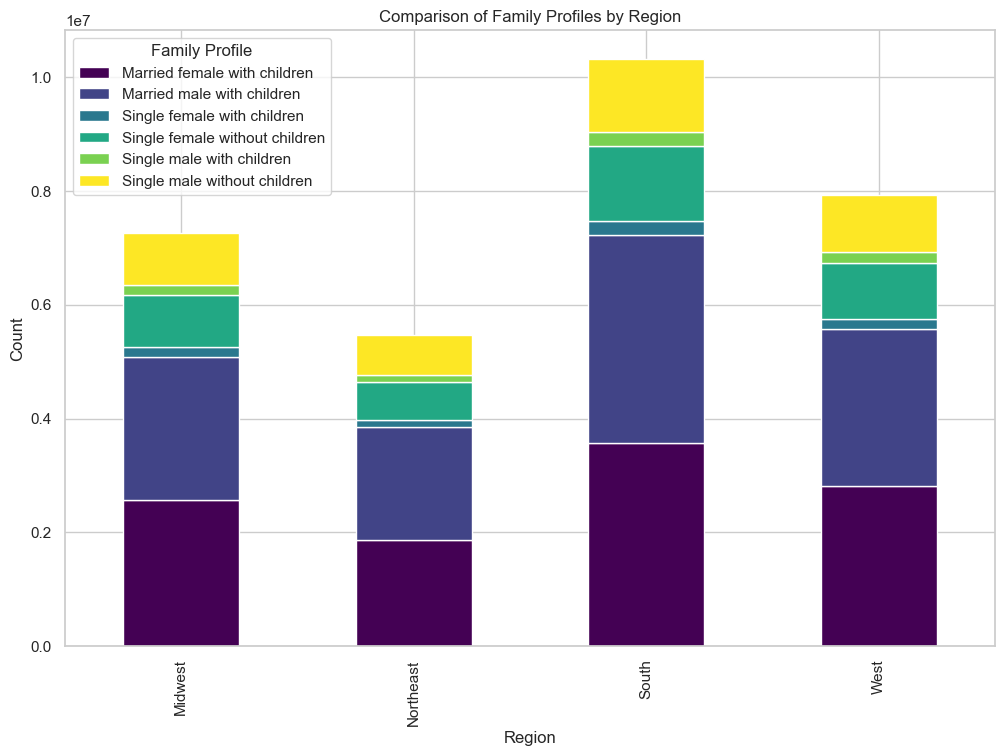

family_profile,Married female with children,Married male with children,Single female with children,Single female without children,Single male with children,Single male without children
region,,,,,,
Midwest,2559521,2526853,171898,905397,179503,917134
Northeast,1857056,1996132,118680,663557,137737,690720
South,3568057,3654517,254069,1314068,251287,1267444
West,2809556,2768508,178817,974732,188988,1005456


In [10]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a grouped DataFrame for family profile by region
family_profile_by_region = df.groupby(['region', 'family_profile']).size().unstack()

# Plot the stacked bar chart
family_profile_by_region.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add labels and title
plt.title('Comparison of Family Profiles by Region')
plt.xlabel('Region')
plt.ylabel('Count')

# Adjust the legend position
plt.legend(title='Family Profile', loc='upper left')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_by_region.png')
plt.savefig(file_path)

# Display the figure
plt.show()

# Display crosstab
family_profile_by_region

### - Family Profile Distribution by Department

<Figure size 1000x1200 with 0 Axes>

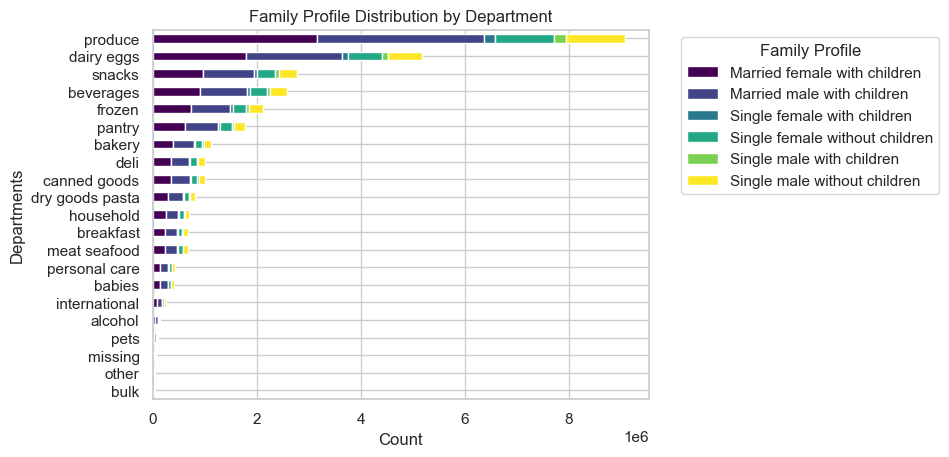

family_profile,Married female with children,Married male with children,Single female with children,Single female without children,Single male with children,Single male without children
department,,,,,,
bulk,11884,11934,777,4081,856,3919
other,11809,12073,868,4478,947,4236
missing,22003,23513,1615,8266,1702,7669
pets,31369,32751,2525,11473,2813,12129
alcohol,52459,46962,3784,18601,4595,18226
international,88738,90398,5903,31987,6491,32474
babies,140919,146764,9253,50469,10128,52859
personal care,148344,149556,10071,53509,10130,52696
meat seafood,235817,240742,15759,81908,16585,83970


In [13]:
# Create a crosstab of family profiles by department
family_profile_department_cross_tab = pd.crosstab(df['department'], df['family_profile'])

# Sort the crosstab by a specific column
fam_departments_profile_bar = family_profile_department_cross_tab.sort_values(by='Single female with children', ascending=True)

# Create a figure with specific dimensions
plt.figure(figsize=(10, 12))  

# Create a horizontal bar chart from the sorted crosstab
fam_departments_profile_bar.plot.barh(stacked=True, colormap='viridis')

# Add a title to the plot
plt.title('Family Profile Distribution by Department')

# Label the x-axis
plt.xlabel('Count')

# Label the y-axis
plt.ylabel('Departments')

# Add a legend with a title, positioned outside the plot area
plt.legend(title='Family Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure to a specified path and filename
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_by_department.png'))

# Display the figure
plt.show()

# Display crosstab
fam_departments_profile_bar

### - Income Group Distribution

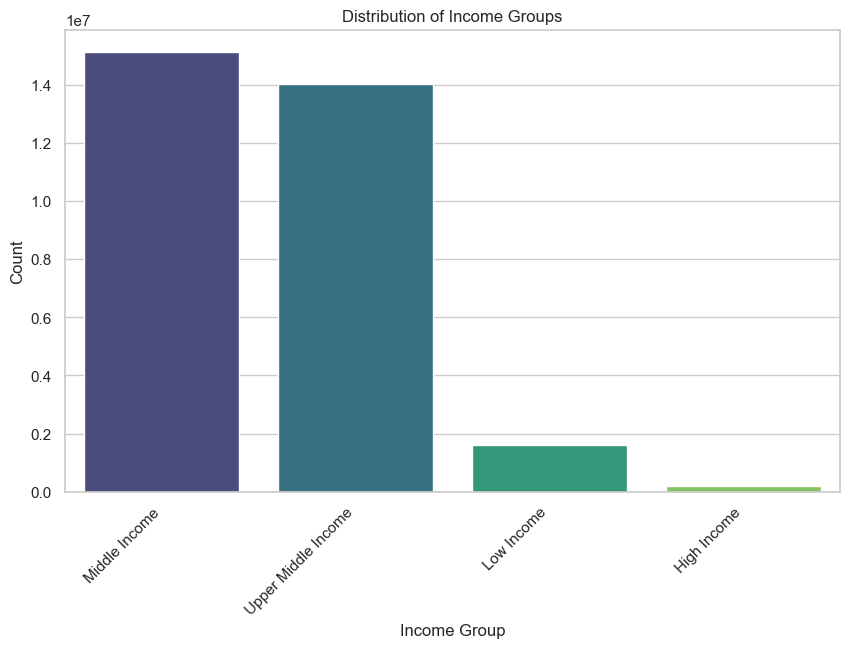

In [14]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for the distribution of income groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='income_group', order=df['income_group'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Count')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_distribution.png')
plt.savefig(file_path)

# Display the figure
plt.show()

### - Income Group Distribution by Region

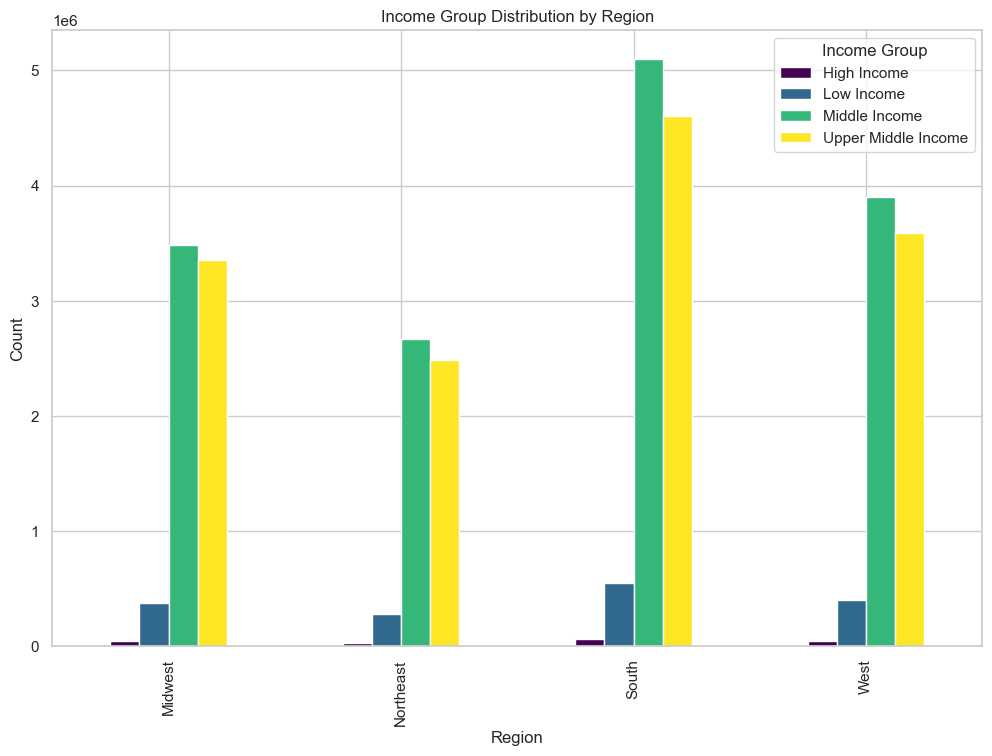

income_group,High Income,Low Income,Middle Income,Upper Middle Income
region,,,,
Midwest,48124,373583,3487749,3350850
Northeast,28389,283124,2665043,2487326
South,60064,552104,5095381,4601893
West,41395,403214,3897075,3584373


In [15]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a grouped DataFrame for income group by region
income_group_by_region = df.groupby(['region', 'income_group']).size().unstack()

# Plot the grouped bar chart
income_group_by_region.plot(kind='bar', figsize=(12, 8), colormap='viridis')

# Add labels and title
plt.title('Income Group Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Income Group')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_by_region.png')
plt.savefig(file_path)

# Display the figure
plt.show()

# Display crosstab
income_group_by_region

### - Income Group Distribution by Department

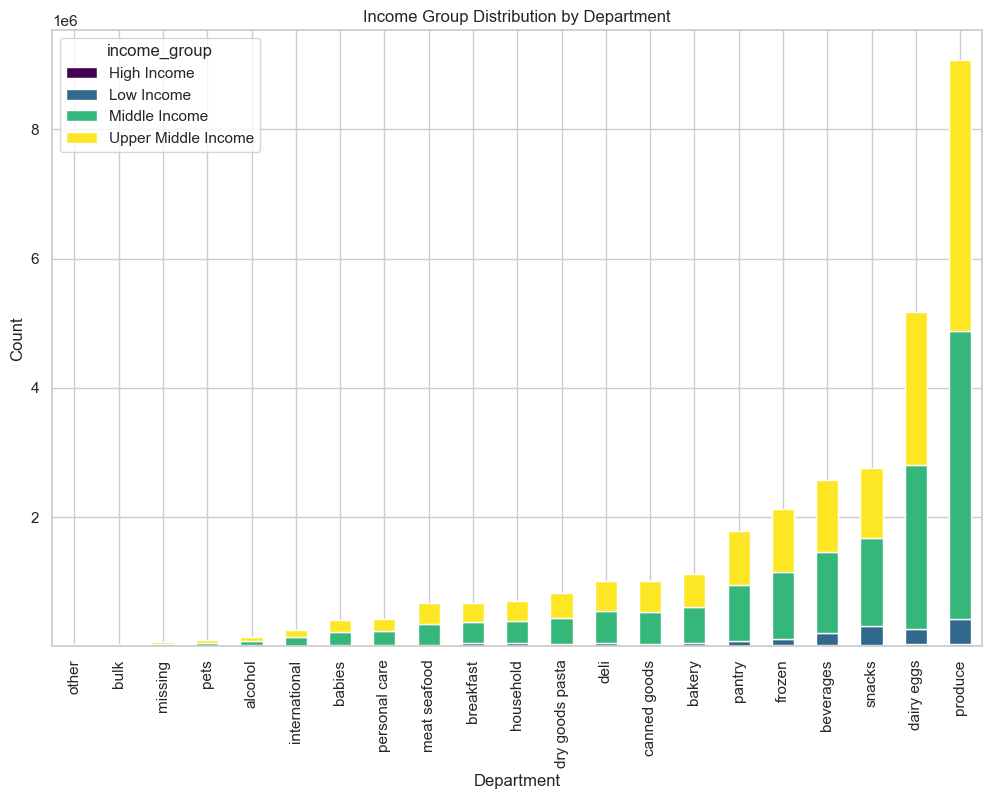

income_group,High Income,Low Income,Middle Income,Upper Middle Income
department,,,,
other,339,1990,16672,15410
bulk,18,2247,16986,14200
missing,215,3121,32195,29237
pets,1305,4421,43550,43784
alcohol,4644,8718,66767,64498
international,1576,9997,126007,118411
babies,1432,12547,201149,195264
personal care,2849,22823,208071,190563
meat seafood,4325,12907,326339,331210


In [16]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a grouped DataFrame for income group by department
income_group_by_department = df.groupby(['department', 'income_group']).size().unstack()

# Sort the DataFrame by the 'Middle income' column in ascending order
income_group_by_department_sorted = income_group_by_department.sort_values(by='Middle Income', ascending=True)

# Plot the grouped bar chart
income_group_by_department_sorted.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add labels and title
plt.title('Income Group Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_by_department.png')
plt.savefig(file_path)

# Display the figure
plt.show()

# Display crosstab
income_group_by_department_sorted

### - Age Group Distribution

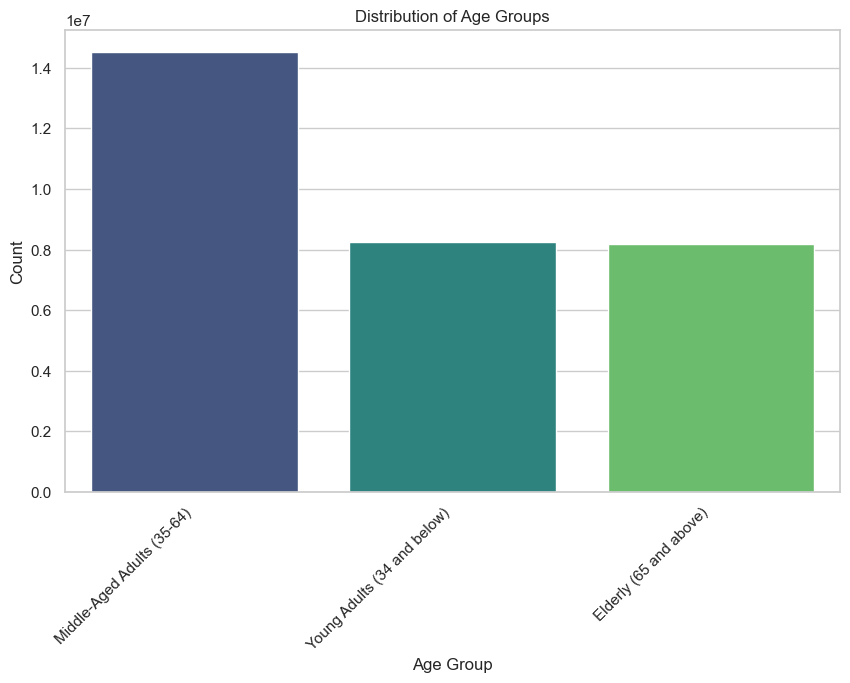

In [17]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for the distribution of age groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', order=df['age_group'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_distribution.png')
plt.savefig(file_path)

# Display the figure
plt.show()

In [18]:
# Aggregating the max, mean, and min variables on a customer-profile level (age_group) for usage frequency and expenditure

age_group_agg = df.groupby('age_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

age_group_agg

order_id prices                
                                count    min      mean   max
age_group                                                   
Elderly (65 and above)        8194267    1.0  7.796715  25.0
Middle-Aged Adults (35-64)   14524452    1.0  7.790319  25.0
Young Adults (34 and below)   8240968    1.0  7.784978  25.0

### - Age Group Distribution by Region

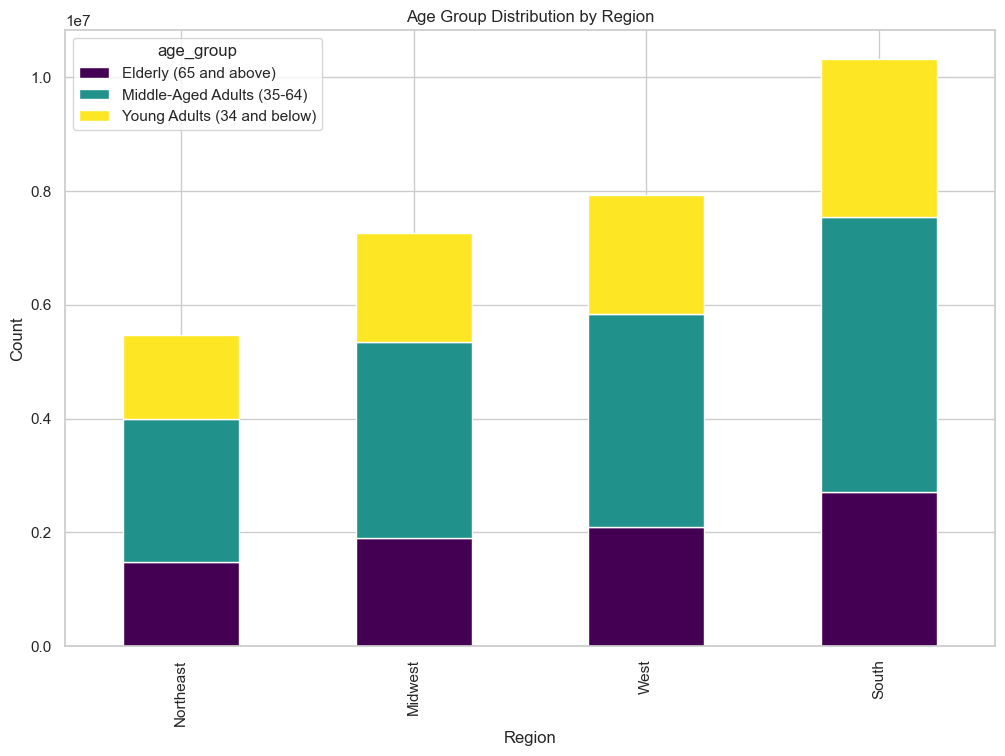

age_group,Elderly (65 and above),Middle-Aged Adults (35-64),Young Adults (34 and below)
region,,,
Northeast,1484610,2511379,1467893
Midwest,1903728,3445035,1911543
West,2097867,3734584,2093606
South,2708062,4833454,2767926


In [19]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a grouped DataFrame for age group by region
age_group_by_region = df.groupby(['region', 'age_group']).size().unstack()

# Sort the DataFrame by a specific age group (e.g., 'Middle-Aged Adults (35-64)') in ascending order
age_group_by_region_sorted = age_group_by_region.sort_values(by='Middle-Aged Adults (35-64)', ascending=True)

# Plot the grouped bar chart
age_group_by_region_sorted.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add labels and title
plt.title('Age Group Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_by_region.png')
plt.savefig(file_path)

# Display the figure
plt.show()

# Display crosstab
age_group_by_region_sorted

### - Age Group Distribution by Department

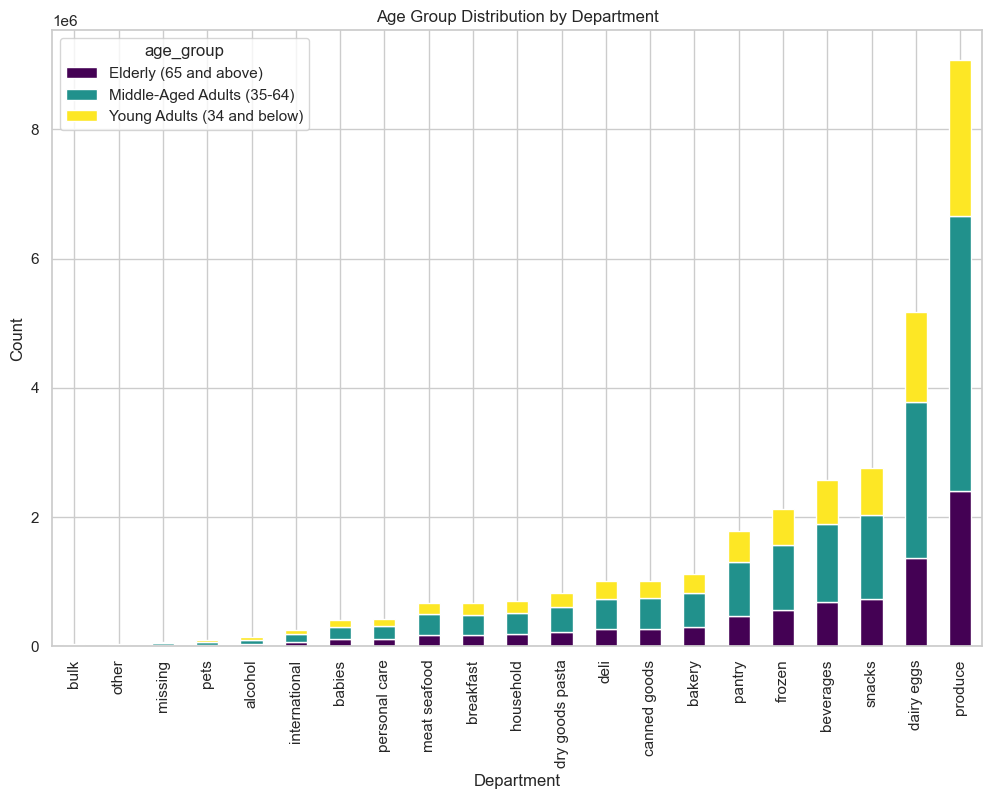

age_group,Elderly (65 and above),Middle-Aged Adults (35-64),Young Adults (34 and below)
department,,,
bulk,8945,15485,9021
other,8946,16023,9442
missing,16915,30100,17753
pets,25115,42805,25140
alcohol,36693,67717,40217
international,67199,119691,69101
babies,106204,196888,107300
personal care,111052,201080,112174
meat seafood,181150,314573,179058


In [20]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a grouped DataFrame for age group by department
age_group_by_department = df.groupby(['department', 'age_group']).size().unstack()

# Sort the DataFrame by a specific age group
age_group_by_department_sorted = age_group_by_department.sort_values(by='Middle-Aged Adults (35-64)', ascending=True)

# Plot the grouped bar chart
age_group_by_department_sorted.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add labels and title
plt.title('Age Group Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_by_department.png')
plt.savefig(file_path)

# Display the figure
plt.show()

# Display crosstab
age_group_by_department_sorted

### - Department Distribution by Number of Orders

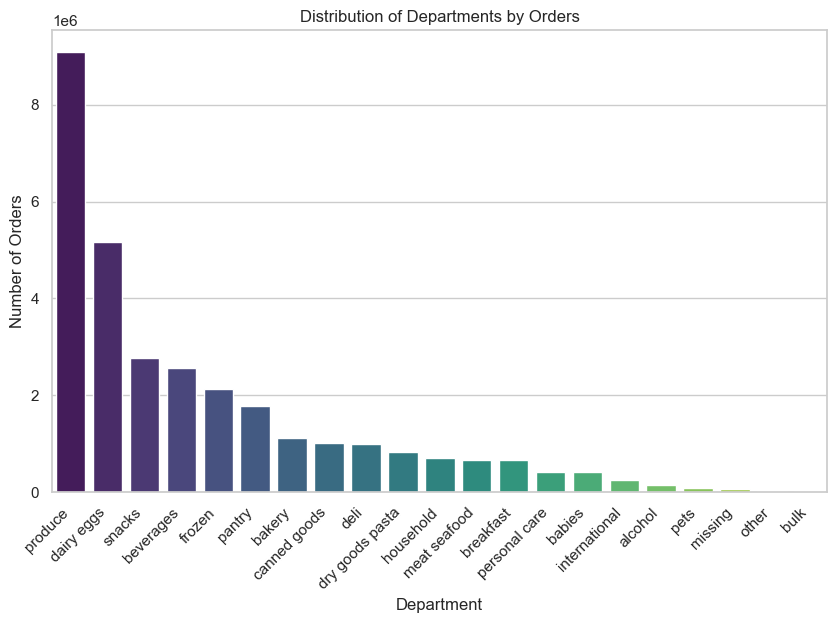

In [21]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for the distribution of departments by orders
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='department', order=df['department'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Departments by Orders')
plt.xlabel('Department')
plt.ylabel('Number of Orders')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'departments_by_orders.png')
plt.savefig(file_path)

# Display the figure
plt.show()

In [22]:
# Aggregating the max, mean, and min variables on a customer-profile level (department) for usage frequency and expenditure

age_group_agg = df.groupby('department').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

age_group_agg

order_id prices                 
                   count    min       mean   max
department                                      
alcohol           144627    1.0   8.150699  15.0
babies            410392    1.0   7.634399  15.0
bakery           1120828    1.0   7.857482  15.0
beverages        2571901    1.0   7.682556  15.0
breakfast         670850    1.0   8.031647  14.9
bulk               33451    1.4   8.346919  14.1
canned goods     1012074    1.0   7.546660  15.0
dairy eggs       5172305    1.0   8.336372  15.0
deli             1003834    1.0   7.783347  15.0
dry goods pasta   822136    1.0   7.349370  15.0
frozen           2121731    1.0   7.733725  15.0
household         699857    1.0   7.379951  15.0
international     255991    1.0   7.678797  15.0
meat seafood      674781    8.0  16.300034  25.0
missing            64768    1.0   8.660655  15.0
other              34411    1.1   6.961995  15.0
pantry           1782705    1.0   8.014482  20.0
personal care     424306    1.0   7.998744  15.0
pets               93060    1.0   7.887489  15.0
produce          9079273    1.0   7.980348  15.0
snacks           2766406    1.6   4.275555   7.0

### - Department Distribution by Region

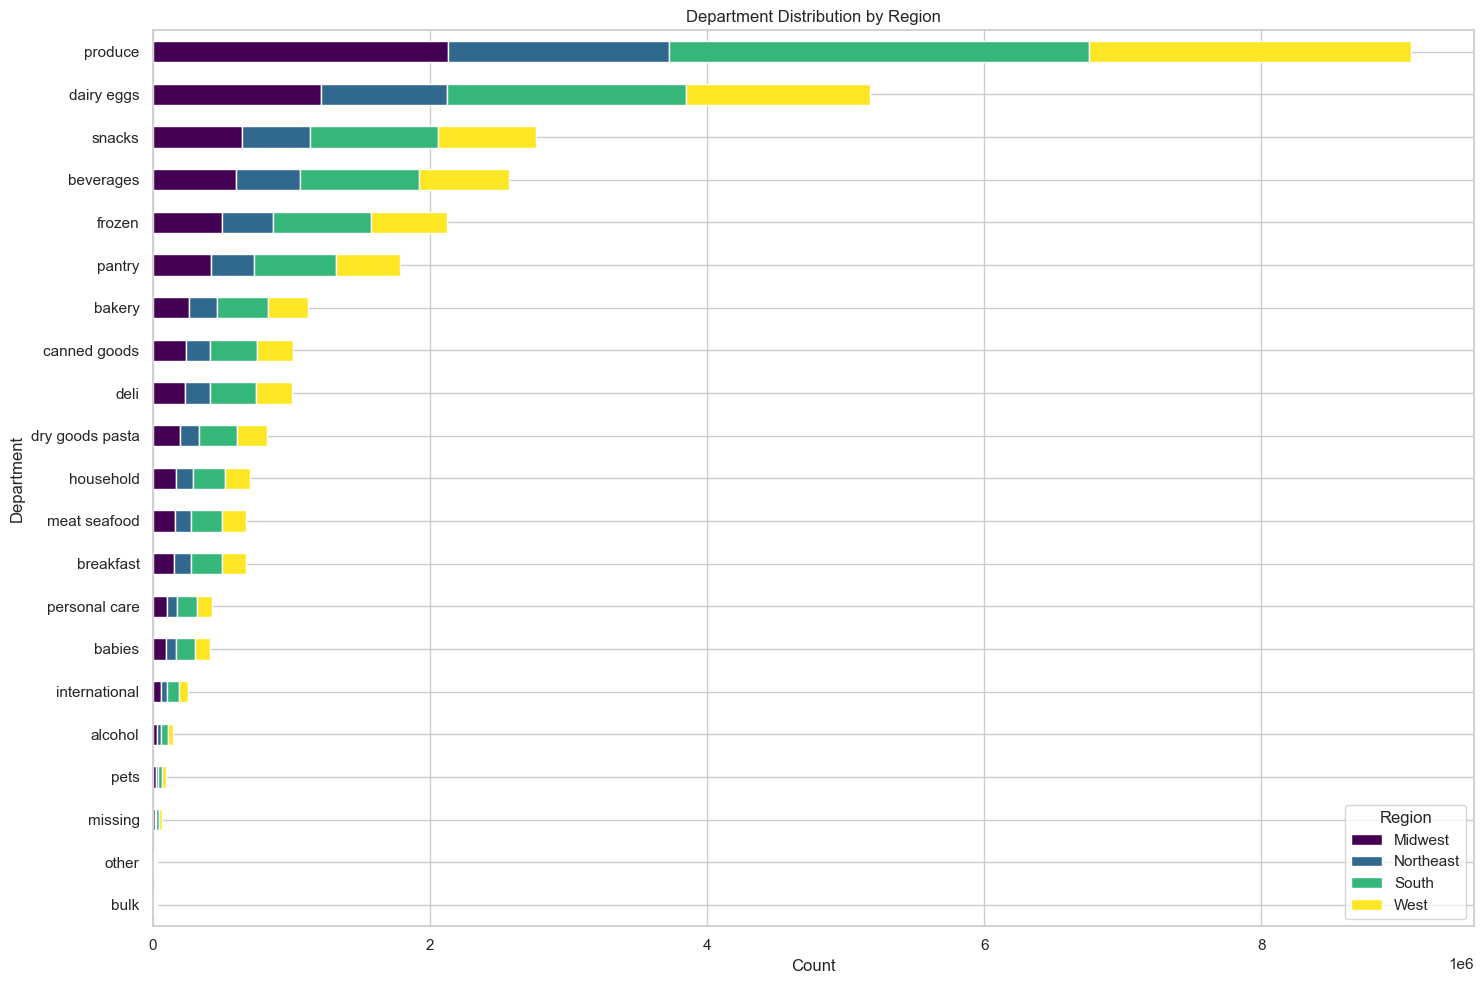

region,Midwest,Northeast,South,West
department,,,,
bulk,7929,5599,11180,8743
other,7983,6268,11579,8581
missing,15563,11512,21787,15906
pets,21358,17734,29909,24059
alcohol,34043,25017,48813,36754
international,60666,44678,84649,65998
babies,95741,72712,139511,102428
personal care,100398,74765,142496,106647
breakfast,156155,117904,223172,173619


In [23]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a grouped DataFrame for department by region
department_by_region = df.groupby(['department', 'region']).size().unstack()

# Sort columns by ascending count for a specific region
department_by_region = department_by_region.sort_values(by='Midwest', ascending=True, axis=0)

# Plot the horizontal stacked bar chart
department_by_region.plot(kind='barh', stacked=True, figsize=(15, 10), colormap='viridis')

# Add labels and title
plt.title('Department Distribution by Region')
plt.xlabel('Count')
plt.ylabel('Department')
plt.legend(title='Region')
plt.tight_layout() 

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'departments_region_bar.png')
plt.savefig(file_path)

# Display the figure
plt.show()

# Display crosstab
department_by_region

## 3. Sales Team Key Questions & Answers

### - Busiest Days of the Week

In [24]:
df['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    5907809
1    5410804
6    4290733
5    4033036
2    4024012
3    3668899
4    3624394
Name: count, dtype: int64

In [25]:
# 0=Saturday, 1=Sunday, 2=Monday, 3=Tuesday, 4=Wednesday, 5=Thursday, 6=Friday

df['day_of_week_orders'] = df['orders_day_of_week'].map({0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'})

In [26]:
df['day_of_week_orders'].value_counts(dropna = False)

day_of_week_orders
Saturday     5907809
Sunday       5410804
Friday       4290733
Thursday     4033036
Monday       4024012
Tuesday      3668899
Wednesday    3624394
Name: count, dtype: int64

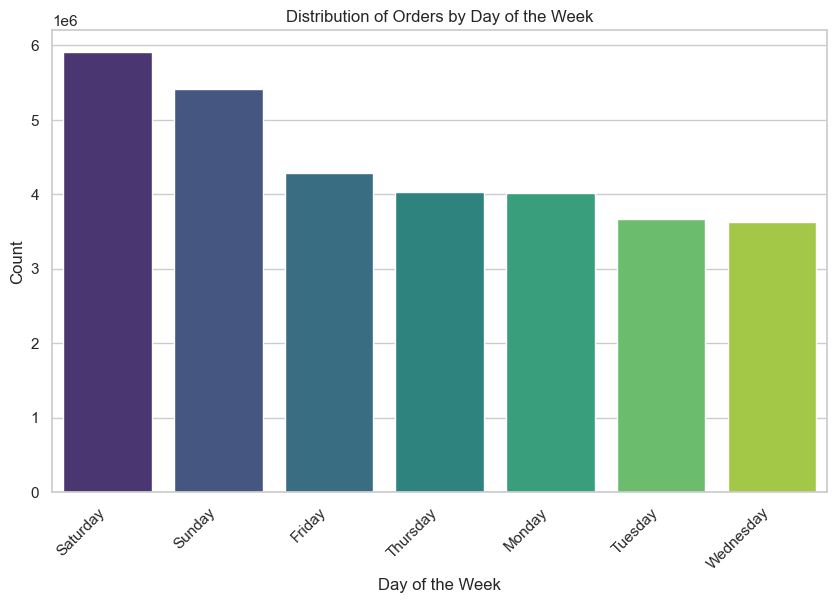

In [27]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for the distribution of orders by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week_orders', order=df['day_of_week_orders'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_days_of_week.png')
plt.savefig(file_path)

# Display the figure
plt.show()

### - Busiest Hours of the Day

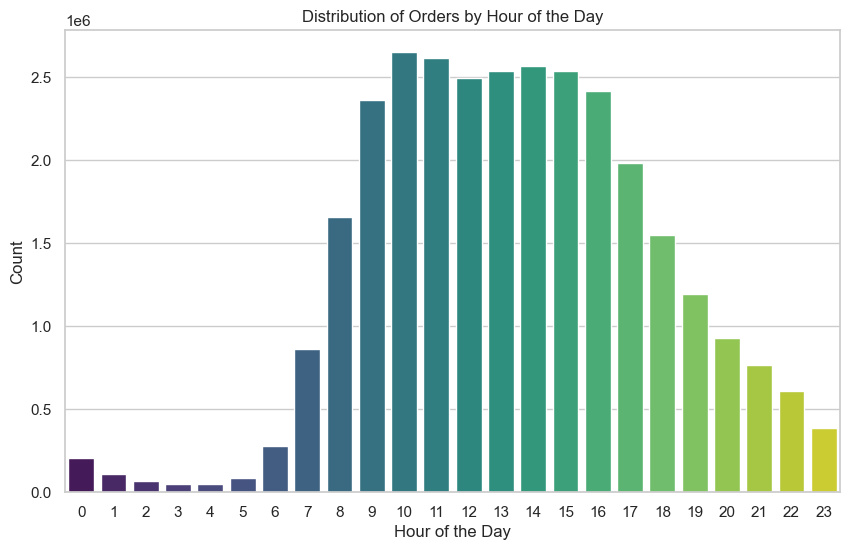

In [28]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for the distribution of orders by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='order_hour_of_day', palette='viridis')
plt.title('Distribution of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_hours_of_day.png')
plt.savefig(file_path)

# Display the figure
plt.show()

### - Busiest Hours of the Day by Price Range

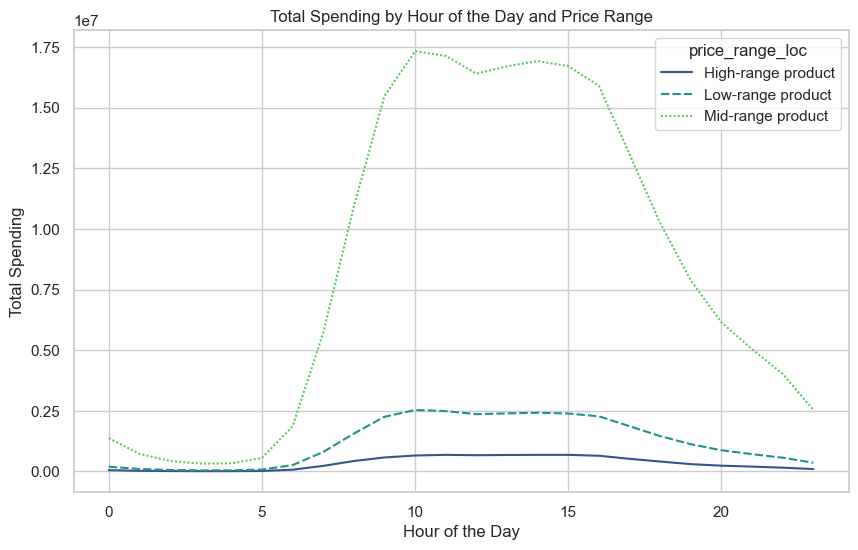

price_range_loc,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,53723.7,195998.6,1375285.2
1,27159.7,102884.9,725611.0
2,17745.3,62490.9,432297.7
3,12380.2,45726.2,323872.0
4,13485.2,47283.9,337245.6
5,20743.3,78287.8,561937.5
6,73945.9,261907.9,1861283.3
7,230391.3,804722.8,5715467.6
8,431830.5,1563499.0,10927153.0


In [29]:
# Create a crosstab
spending_by_hour_and_price_range = pd.crosstab(df['order_hour_of_day'], df['price_range_loc'], values=df['prices'], aggfunc=sum)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a line plot for spending by hour of the day and price range
plt.figure(figsize=(10, 6))
sns.lineplot(data=spending_by_hour_and_price_range, palette='viridis')
plt.title('Total Spending by Hour of the Day and Price Range')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Spending')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'spending_by_hour_and_price_range.png')
plt.savefig(file_path)

# Display the figure
plt.show()

# Print the crosstab
spending_by_hour_and_price_range

### - Price Range Distribution

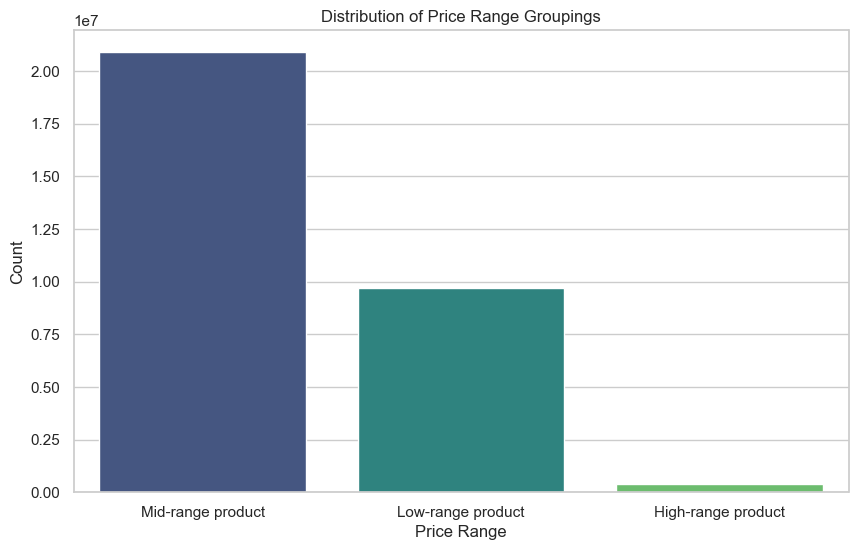

In [30]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for the distribution of price ranges
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_range_loc', order=df['price_range_loc'].value_counts().index, palette='viridis')
plt.title('Distribution of Price Range Groupings')
plt.xlabel('Price Range')
plt.ylabel('Count')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_distribution.png')
plt.savefig(file_path)

# Display the figure
plt.show()

### - Income Group Distribution by Price Range

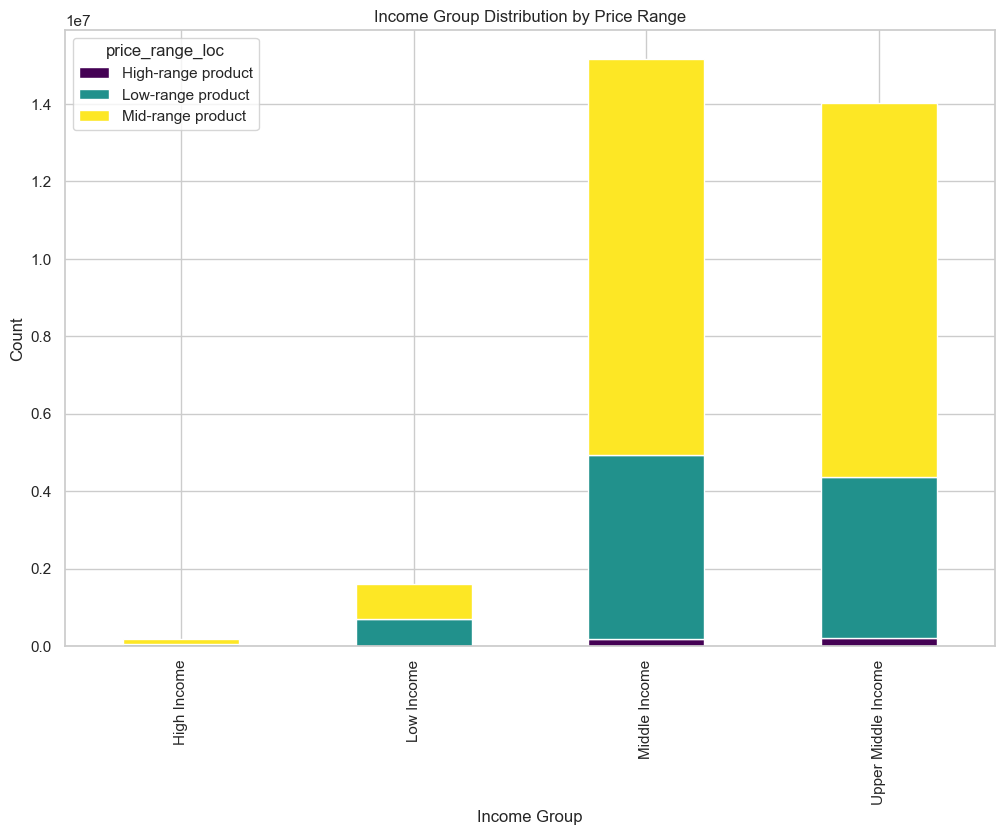

price_range_loc,High-range product,Low-range product,Mid-range product
income_group,,,
High Income,2348,55820,119804
Low Income,6050,697411,908564
Middle Income,189347,4750928,10204973
Upper Middle Income,195331,4170681,9658430


In [31]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a grouped DataFrame for income group by price range
income_group_by_price_range = df.groupby(['income_group', 'price_range_loc']).size().unstack()

# Plot the stacked bar chart
income_group_by_price_range.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add labels and title
plt.title('Income Group Distribution by Price Range')
plt.xlabel('Income Group')
plt.ylabel('Count')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_by_price_range.png')
plt.savefig(file_path)

# Display the figure
plt.show()

# Display crosstab
income_group_by_price_range

### - Price Range Distribution by Family Profile

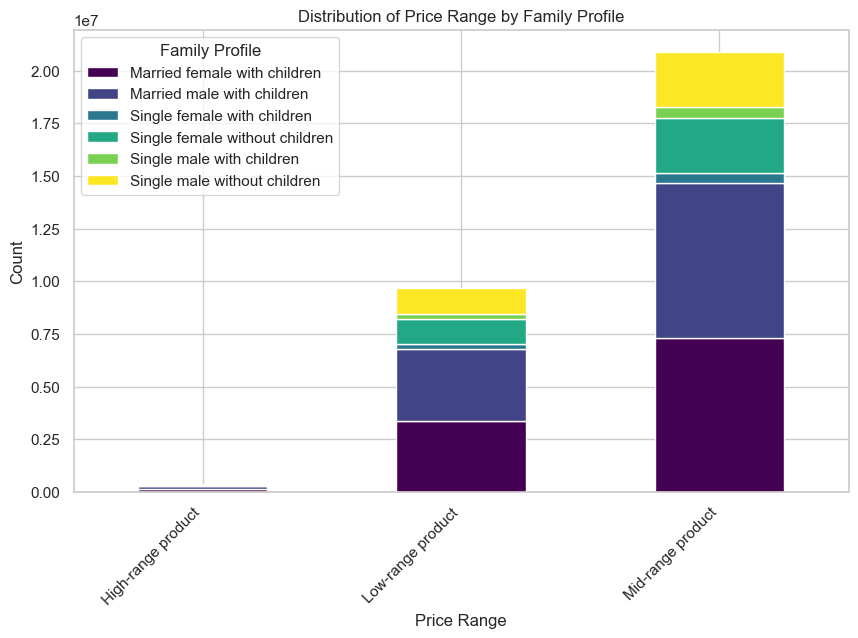

family_profile,Married female with children,Married male with children,Single female with children,Single female without children,Single male with children,Single male without children
price_range_loc,,,,,,
High-range product,137624,140366,9006,47492,9798,48790
Low-range product,3375055,3418740,226195,1205689,235612,1213549
Mid-range product,7281511,7386904,488263,2604573,512105,2618415


In [32]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a grouped DataFrame for price range by family profile
price_range_family_profile = df.groupby(['price_range_loc', 'family_profile']).size().unstack()

# Plot the stacked bar chart
price_range_family_profile.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add labels and title
plt.title('Distribution of Price Range by Family Profile')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Family Profile')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_family_profile_distribution.png')
plt.savefig(file_path)

# Display the figure
plt.show()

# Display crosstab
price_range_family_profile

### - Orders Distribution by Department

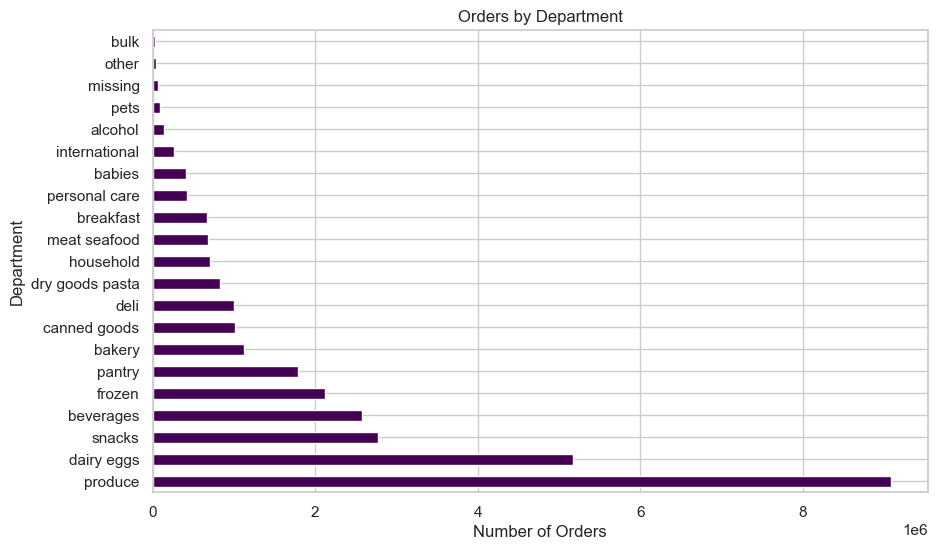

department
produce            9079273
dairy eggs         5172305
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

In [33]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Get the counts of orders by department
department_counts = df['department'].value_counts()

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
department_counts.plot(kind='barh', colormap='viridis')
plt.title('Orders by Department')
plt.xlabel('Number of Orders')
plt.ylabel('Department')

# Save figure to path
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_department.png'))

# Display the figure
plt.show()

# Display crosstab
department_counts

### - Customer Distribution by Brand Loyalty

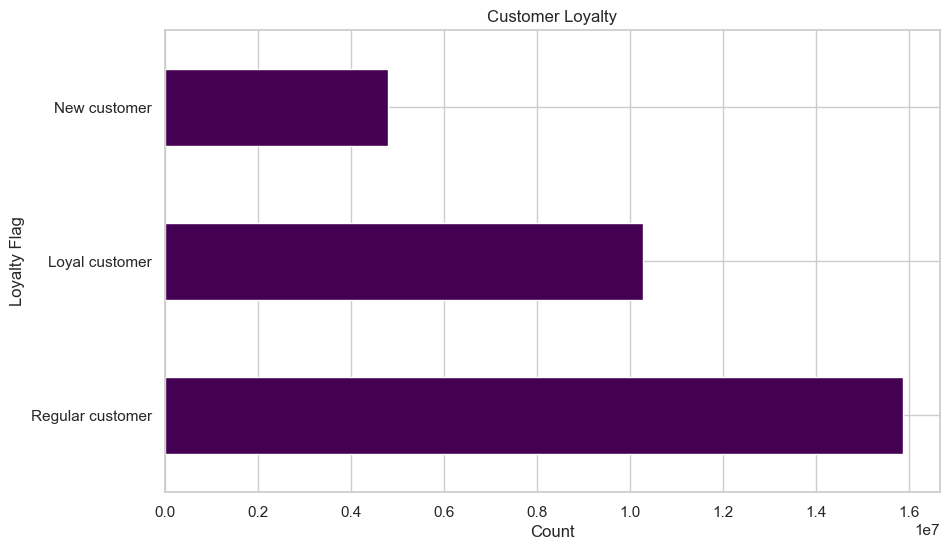

loyalty_flag
Regular customer    15874128
Loyal customer      10282763
New customer         4802796
Name: count, dtype: int64

In [34]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Get the counts of loyalty_flag
loyalty_counts = df['loyalty_flag'].value_counts()

# Plot the horizontal bar chart with 'viridis' color palette
plt.figure(figsize=(10, 6))
loyalty_counts.plot(kind='barh', colormap='viridis')
plt.title('Customer Loyalty')
plt.xlabel('Count')
plt.ylabel('Loyalty Flag')

# Save figure to path
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_distribution.png'))

# Display the figure
plt.show()

# Display crosstab
loyalty_counts

### - Ordering Habits by Customer's Loyalty

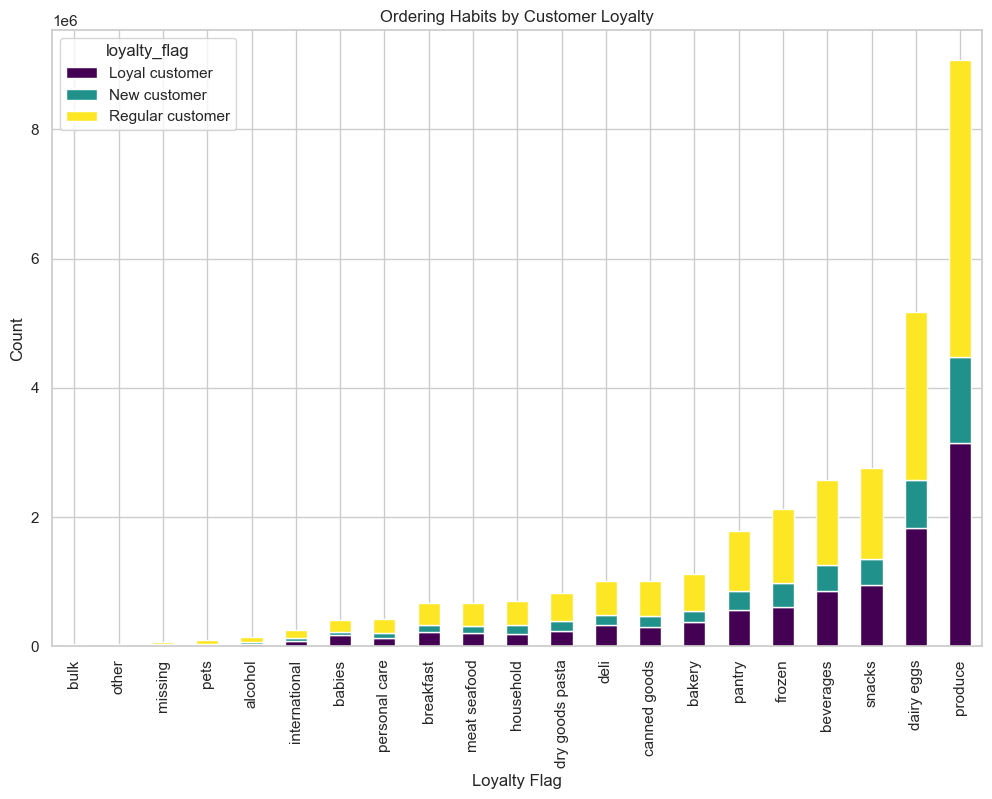

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
bulk,13834,4149,15468
other,10715,5839,17857
missing,18350,12713,33705
pets,25469,15880,51711
alcohol,38723,28629,77275
international,78394,43841,133756
babies,167108,46708,196576
personal care,123365,75442,225499
breakfast,221577,106179,343094


In [35]:
# Create a crosstab for loyalty_flag and department
loyalty_department_crosstab = pd.crosstab(df['department'], df['loyalty_flag'])

# Sort the crosstab by a specific loyalty flag (e.g., 'Regular customer') in ascending order
loyalty_department_crosstab_sorted = loyalty_department_crosstab.sort_values(by='Regular customer', ascending=True)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a stacked bar plot for the crosstab
loyalty_department_crosstab_sorted.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Ordering Habits by Customer Loyalty')
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')

# Save figure to path
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ordering_habits_by_loyalty.png'))

# Display the figure
plt.show()

# Display crosstab
loyalty_department_crosstab_sorted

### - Ordering Habits by Region

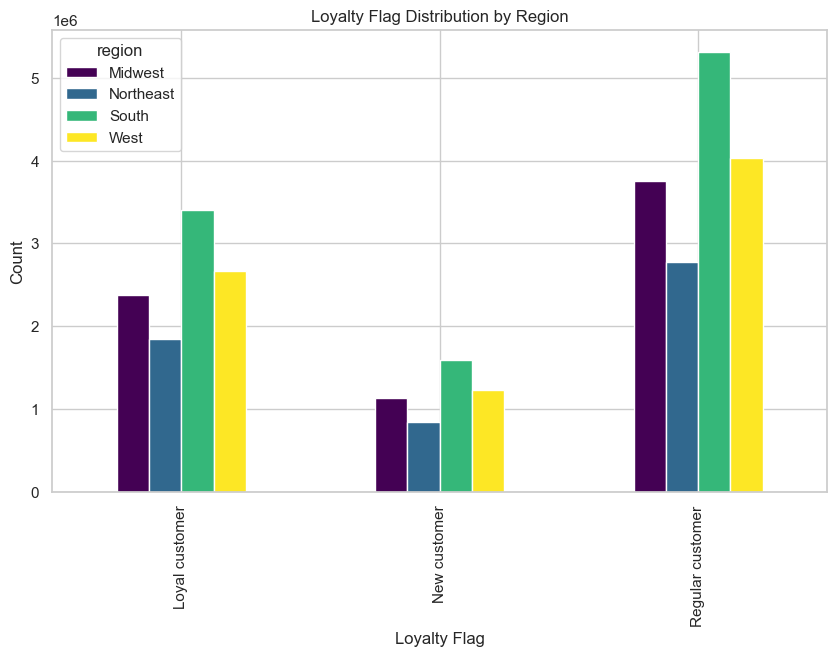

region,Midwest,Northeast,South,West
loyalty_flag,,,,
Loyal customer,2373472,1841559,3405328,2662404
New customer,1136563,842001,1593359,1230873
Regular customer,3750271,2780322,5310755,4032780


In [36]:
# Create a crosstab for loyalty_flag and region
loyalty_region_crosstab = pd.crosstab(df['loyalty_flag'], df['region'])

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for the crosstab
loyalty_region_crosstab.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Loyalty Flag Distribution by Region')
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')

# Save figure to path
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ordering_habits_by_region.png'))

# Display the figure
plt.show()

# Display the crosstab
loyalty_region_crosstab

### - Ordering Habits Distribution by Age Group and Family Profile

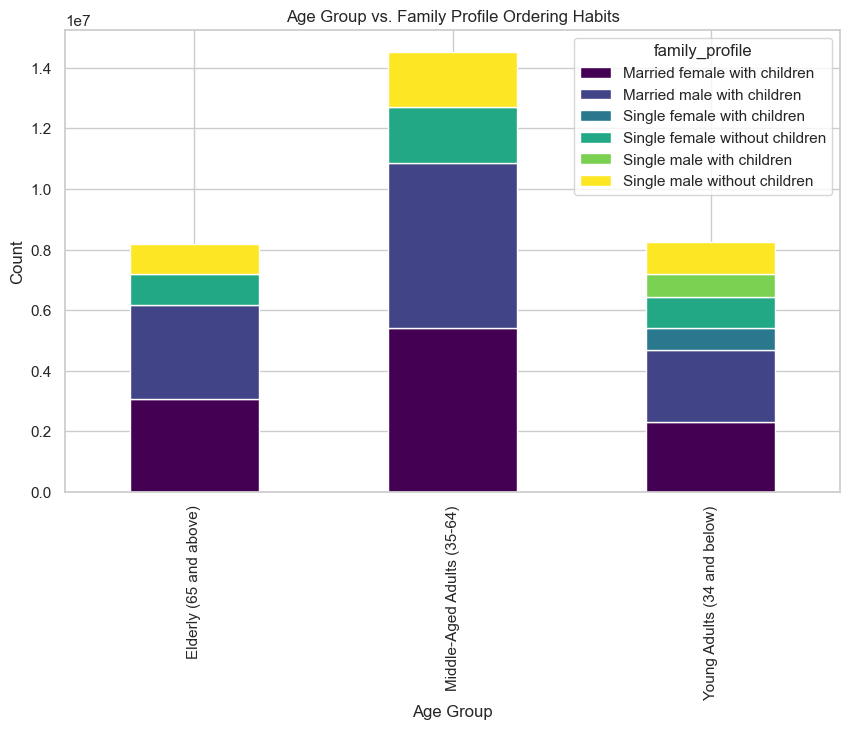

family_profile,Married female with children,Married male with children,Single female with children,Single female without children,Single male with children,Single male without children
age_group,,,,,,
Elderly (65 and above),3066288,3106375,0,1021277,0,1000327
Middle-Aged Adults (35-64),5401315,5469488,0,1824646,0,1829003
Young Adults (34 and below),2326587,2370147,723464,1011831,757515,1051424


In [37]:
# Create a crosstab for age_group and family_profile
age_family_crosstab = pd.crosstab(df['age_group'], df['family_profile'])

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the stacked bar chart
age_family_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Age Group vs. Family Profile Ordering Habits')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'age_vs_family_ordering_habits_stacked_bar.png')
plt.savefig(file_path)

# Display the figure
plt.show()

# Display crosstab
age_family_crosstab

### - Spending Power Distribution by Age and Income

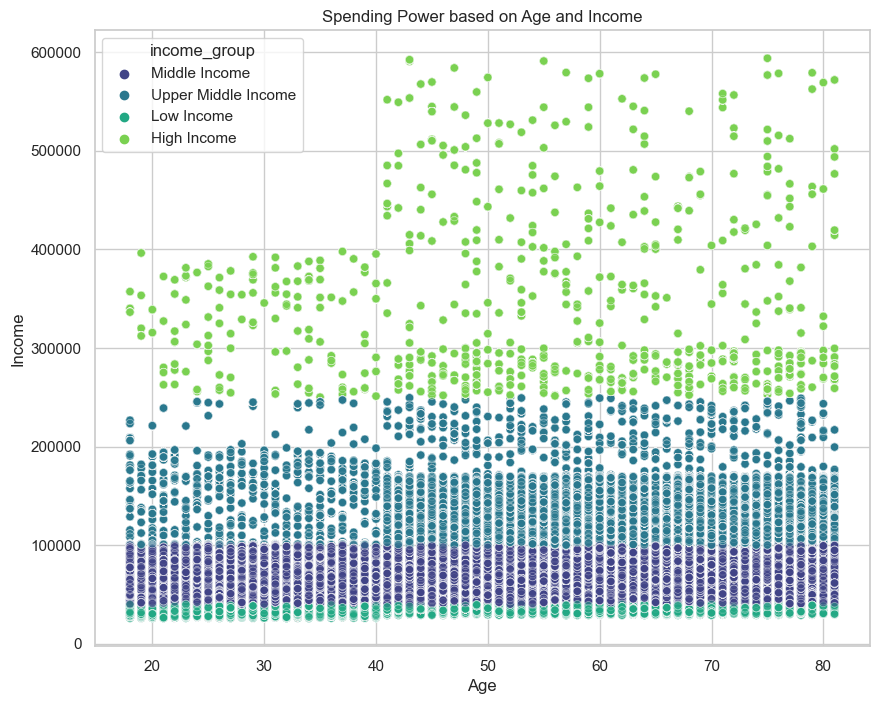

In [38]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a scatter plot for spending power based on age and income
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='age', y='income', hue='income_group', palette='viridis', alpha=0.5)
plt.title('Spending Power based on Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'spending_power_scatterplot.png')
plt.savefig(file_path)

# Display the figure
plt.show()

### *The scatter plot shows a positive correlation of spending power for customers over the age of 40*

### - Spending Power Distribution by Age and Family Profile

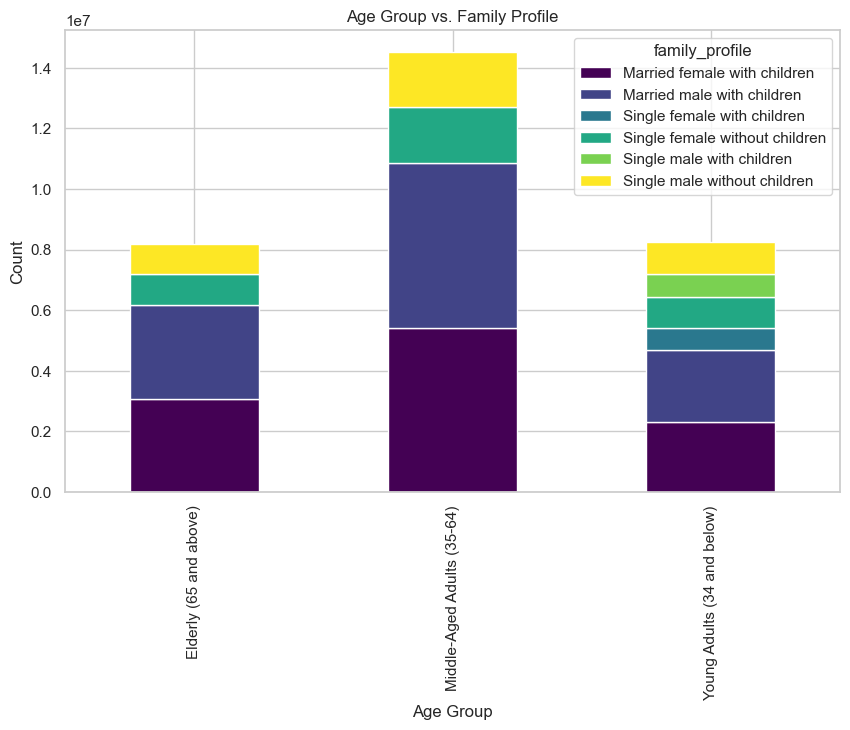

family_profile,Married female with children,Married male with children,Single female with children,Single female without children,Single male with children,Single male without children
age_group,,,,,,
Elderly (65 and above),3066288,3106375,0,1021277,0,1000327
Middle-Aged Adults (35-64),5401315,5469488,0,1824646,0,1829003
Young Adults (34 and below),2326587,2370147,723464,1011831,757515,1051424


In [39]:
# Create a crosstab for age_group and family_profile
age_family_crosstab = pd.crosstab(df['age_group'], df['family_profile'])

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the stacked bar chart
age_family_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Age Group vs. Family Profile')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'age_vs_family_profile_stacked_bar.png')
plt.savefig(file_path)

# Display the figure
plt.show()

# Display the crosstab
age_family_crosstab

### - Family Status Distribution

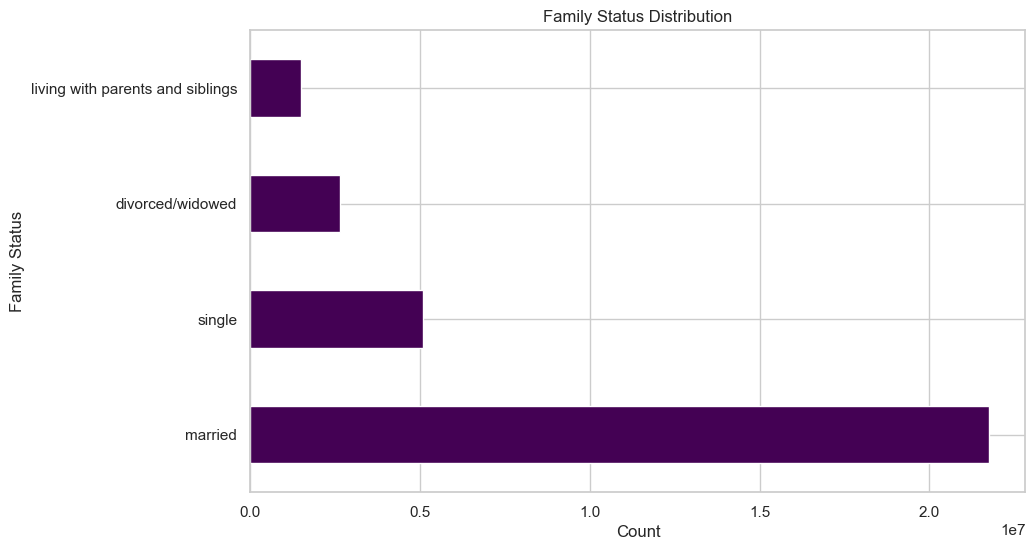

family_status
married                             21740200
single                               5093677
divorced/widowed                     2644831
living with parents and siblings     1480979
Name: count, dtype: int64

In [40]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Get the counts of family_status
family_status_counts = df['family_status'].value_counts()

# Plot the horizontal bar chart with 'viridis' color palette
plt.figure(figsize=(10, 6))
family_status_counts.plot(kind='barh', colormap='viridis')
plt.title('Family Status Distribution')
plt.xlabel('Count')
plt.ylabel('Family Status')

# Save figure to path
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'family_status_distribution.png')
plt.savefig(file_path)

# Display the figure
plt.show()

# Display the crosstab
family_status_counts

### *Most customers are married.*

In [42]:
df.shape

(30959687, 37)